In [8]:
from pylab import *
from numpy import *
%matplotlib inline

# Problema 1

Método de Euler
El método de Euler es el método mas intuitivo para integrar, sirve para integrar ecuaciónes diferenciales de la forma y'=f(t,y).

La idea es sencilla si conocemos la "velocidad" del objeto en cada punto podemos obtener una aproximación de donde estará el objeto en el tiempo t_{0}+h multiplicando la velocidad por una cantidad de tiempo muy pequeña (h).

In [9]:
#Esta función integra una ecuación diferencial toma como argumentos:
#ec: la ecuación diferencial a integrar
#p_ini: siguiendo con la anlogía del cuerpo en movimiento, debemos decirle a la función el 
#       punto donde inicia el movimiento del cuerpo, por no sólo es la posición sino tambien el tiempo, queda en la forma (t,posicion)
#x: Son los tiempos inicial y final de la integración en el tiempo t=x[0] el cuerpo se encuentra en p_ini
#   y en el tiempo t=x[1] termina la integración
#h: Es el tamaño del paso, es decir el intervalo de tiempo por el que se multiplica la velocidad
def euler(ec,p_ini,x,h=0.1):
#Se define un arreglo llamado tiempos que guardará las tiempos para los cuales calculamos su posición
    tiempos = arange(x[0],x[1]+h,h)
#Se define un arreglo de ceros de tamaño del arreglo de tiempos por la dimensión del vector posición
    sol = zeros((len(tiempos),len(p_ini)))
#por supuesto el punto en el tiempo inicial es el punto inicial
    sol[0,:] = p_ini
#El for realiza la integración
    for i in xrange(len(tiempos)-1):
#Calcula la velocidad en el punto i
        f = ec(sol[i,:],tiempos[i])
#Calcula el siguiente punto
        sol[i+1,:]=sol[i,:]+h*f
#la función regresa el array con los tiempos y el array con
    return tiempos,sol

In [10]:
def mi_ec_diff(y,t):
    return y

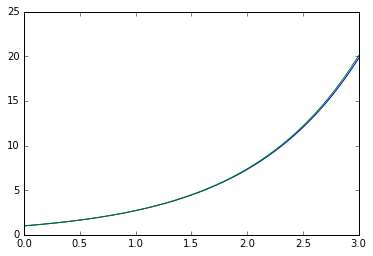

In [11]:
sol = euler(mi_ec_diff,[1],[0,3],.01)
plot(sol[0],sol[1],sol[0],exp(sol[0]))
show()

El siguiente método es el método de segundo órden:
Para obtener un mejor resultado en la integracion se utiliza la aproximación de segundo orden
$$
\vec y_{n+1} = \vec y_{n} + h*\vec f + \frac{1}{2}h² \left(\frac{\partial \vec f}{\partial x} +\mathbb{J}\vec f \right)
$$
para usar éste método hay que proporcional la ecuación diferencial y su derivada con respecto al tiempo y su jacobiano

In [12]:
#Esta función integra una ecuación diferencial toma como argumentos:
#ec: la ecuación diferencial a integrar
#d_ec: la derivada con respecto a al tiempo y el jacobiano de la funcion, está en la forma df,Jac(f)
#p_ini: siguiendo con la anlogía del cuerpo en movimiento, debemos decirle a la función el 
#       punto donde inicia el movimiento del cuerpo, por no sólo es la posición sino tambien el tiempo, queda en la forma (t,posicion)
#x: Son los tiempos inicial y final de la integración en el tiempo t=x[0] el cuerpo se encuentra en p_ini
#   y en el tiempo t=x[1] termina la integración
#h: Es el tamaño del paso, es decir el intervalo de tiempo por el que se multiplica la velocidad
def integra2(ec,d_ec,p_ini,x,h=0.1):
#Se define un arreglo llamado tiempos que guardará las tiempos para los cuales calculamos su posición
    tiempos = arange(x[0],x[1]+h,h)
#Se define un arreglo de ceros de tamaño del arreglo de tiempos por la dimensión del vector posición
    sol = zeros((len(tiempos),len(p_ini)))
#por supuesto el punto en el tiempo inicial es el punto inicial
    sol[0,:] = p_ini
#El for realiza la integración
    for i in xrange(len(tiempos)-1):
#Calcula la velocidad en el punto i
        f = ec(sol[i,:],tiempos[i])
#Evalúa el jacobiano y la derivada en el punto i
        df,jac=d_ec(sol[i,:],tiempos[i])
#Calcula el punto i+1
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
#regreso el arreglo de los tiempos y la solución
    return tiempos,sol

Runge Kuta de orden 2


In [14]:
#Esta función integra una ecuación diferencial toma como argumentos:
#ec: la ecuación diferencial a integrar
#p_ini: siguiendo con la anlogía del cuerpo en movimiento, debemos decirle a la función el 
#       punto donde inicia el movimiento del cuerpo, por no sólo es la posición sino tambien el tiempo, queda en la forma (t,posicion)
#x: Son los tiempos inicial y final de la integración en el tiempo t=x[0] el cuerpo se encuentra en p_ini
#   y en el tiempo t=x[1] termina la integración
#h: Es el tamaño del paso, es decir el intervalo de tiempo por el que se multiplica la velocidad
def Runge_Kuta2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

Runge-Kutta 4to órden
Este método queda descrito por la siguiente fórmula:
$$
\vec y_{n+1} = \vec y_{n} + \frac{h}{6}(K_{1} + 2K_{2} + 2K_{3}+ K_{4})
$$
Donde
$$
K_{1} = f(t+\frac{h}{2},y)
$$
$$
K_{2} = f(t+\frac{h}{2},y + \frac{h}{2}*K_{1})
$$
$$
K_{3} = f(t+\frac{h}{2},y + \frac{h}{2}*K_{2})
$$
$$
K_{4} = f(t+\frac{h}{2},y + \frac{h}{2}*K_{
3})
$$

In [15]:
#Los argumentos son los mismos que en la anterior
def Runge_Kuta4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+h*k1/2,tiempos[i]+h/2)
        k3 = ec(sol[i,:]+h*k2/2,tiempos[i]+h/2)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para y(t)
$$
x'' + 0.5x'+ sin(x) = e^{-t}sin(3t)
$$
para las condiciones iniciales x'(0) = 1 y x(0) = 0

Lo primero es escribir la ecuación diferencial, para esto tenemos que transformar nuestro sistema de segundo órden en un sistema de primer órden de 2 ecuaciones diferenciales
Así hagamos 
$$
Y[0] = x
$$
$$
Y[1] = x´
$$
entonces nuestro sistema de ecuaciones queda:
$$
Y[0]' = Y[1]
$$
$$
Y[1]' = 0.5Y[1] - sin(Y[0]) + e^{-t}sin(3t)
$$

In [16]:
def ec_1(y,t):
    return array([y[1],-0.5*y[1]-sin(y[0])+exp(-t)*sin(3.*t)])
def d_ec_1(y,t):
    #return (df/dt),jac(f)
    return array([0.,-exp(-t)*sin(3.*t)+3.*exp(-t)*cos(3.*t)]),array([[0.,1.],[-cos(y[0]),0.5]])

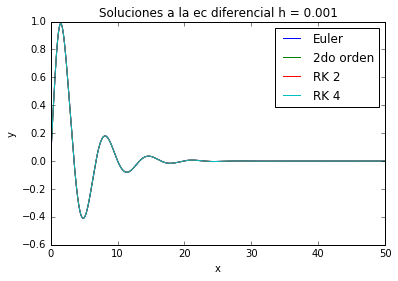

In [43]:
t,sol1 = euler(ec_1,[0,1],[0,50],0.001)
plot(t,sol1[:,0], label = 'Euler')
t,sol2 = integra2(ec_1,d_ec_1,[0,1],[0,50],0.001)
plot(t,sol2[:,0], label ='2do orden')
t,sol3 = Runge_Kuta2(ec_1,[0,1],[0,50],0.001)
plot(t,sol3[:,0],label ='RK 2')
t,sol4 = Runge_Kuta4(ec_1,[0,1],[0,50],0.001)
plot(t,sol4[:,0],label ='RK 4')

xlabel('x')
ylabel('y')
legend()
plt.title(u'Soluciones a la ec diferencial h = 0.001')
show()

show()

Observamos que todos los métodos coinciden, concluimos que como los métodos son de distinto orden y concuerdan tenemos una convergencia aceptable.

# Problema 2

Problema 2
Utilizando los integradores encuentre el mejor paso para la siguiente ecuación
$$
y''' + y''^{2} - 3y'^{3} + cos^{2}(y) =  e^{-t}sin(3t)
$$

Primero escribamos la ecuación diferencial y el jacobiano de la misma

In [22]:
def ec_2(y,t):
    return array([y[1],y[2],-y[2]*y[2]+3.*y[1]*y[1]*y[1]-cos(y[0])*cos(y[0])+exp(-t)*sin(3.*t)])

def d_ec_2(y,t):
    return array([0,0,-exp(-t)*sin(3.*t)+3.*exp(-t)*cos(3.*t)]),array([[0,1,0],[0,0,1],[-2.*cos(y[0])*sin(y[0]),9.*y[1]*y[1],-2.*y[2]]])


Solucion con el método de euler
h=0.00001

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


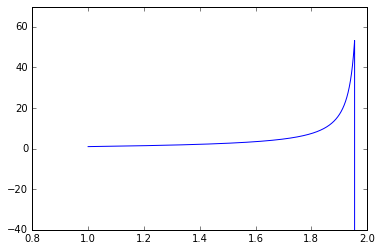

In [35]:
t,sol5 = euler(ec_2,[1,2,1],[1,2],0.00001)
plot(t,sol5[:,0])
plt.ylim([-40,70])
show()

h = 0.000001

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


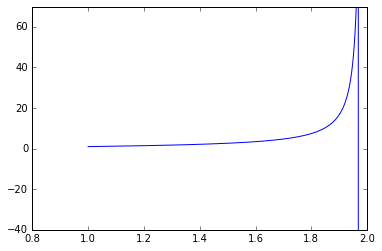

In [37]:
t,sol5 = euler(ec_2,[1,2,1],[1,2],0.000001)
plot(t,sol5[:,0])
plt.ylim([-40,70])
show()

Solucion con el método de Taylor de segundo orden
h=0.00001
intervalo [1,2]

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in add


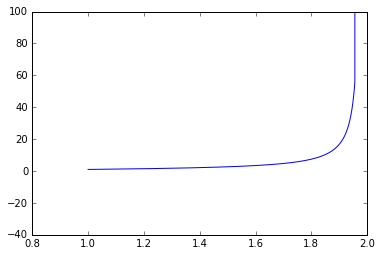

In [41]:
t,sol5 = integra2(ec_2,d_ec_2,[1,2,1],[1,2],0.00001)
plot(t,sol5[:,0])
plt.ylim([-40,100])
show()

Solucion con el método de Taylor de segundo orden
h=0.00001
intervalo [1,2.1]

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in add


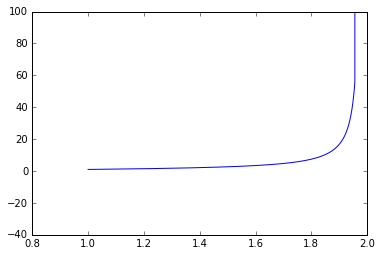

In [42]:
t,sol5 = integra2(ec_2,d_ec_2,[1,2,1],[1,2.1],0.00001)
plot(t,sol5[:,0])
plt.ylim([-40,100])
show()

Solución con el método Runge-Kuta de cuarto órden
h=0.00001
Intervalo [1,2]

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


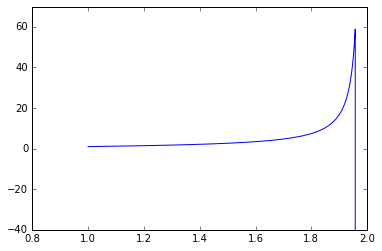

In [33]:
t,sol5 = Runge_Kuta4(ec_2,[1,2,1],[1,2],0.00001)
plot(t,sol5[:,0])
plt.ylim([-40,70])
show()

Solución con el método Runge-Kuta de cuarto órden
h=0.00001
Intervalo [1,2]

Solución con el método Runge-Kuta de cuarto órden
h=0.000001

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


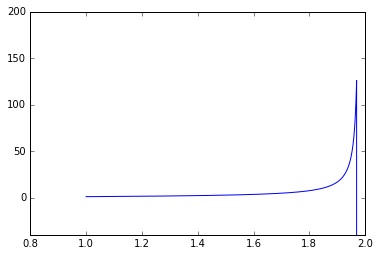

In [79]:
t,sol5 = Runge_Kuta4(ec_2,[1,2,1],[1,2],0.000001)
plt.ylim([-40,200])
plot(t,sol5[:,0])
show()

Lo que observamos es que la solución alcanza un valor grande entre 1.8 y 2.0 para luego descender vertiginosamente, el pico parece hacerse mas grande cada vez que se aumenta la precisión lo que sugiere que la función diverge en ese punto

# Problema 3


************En las gráficas de esta sección la solución fue graficada con dos h's para checar convergencia

In [46]:
#Esta función integra una ecuación diferencial toma como argumentos:
#ec: la ecuación diferencial a integrar
#p_ini: siguiendo con la anlogía del cuerpo en movimiento, debemos decirle a la función el 
#       punto donde inicia el movimiento del cuerpo, por no sólo es la posición sino tambien el tiempo, queda en la forma (t,posicion)
#x: Son los tiempos inicial y final de la integración en el tiempo t=x[0] el cuerpo se encuentra en p_ini
#   y en el tiempo t=x[1] termina la integración
#h: Es el tamaño del paso, es decir el intervalo de tiempo por el que se multiplica la velocidad
def euler_args(ec,p_ini,x,h=0.1,args = " "):
#Se define un arreglo llamado tiempos que guardará las tiempos para los cuales calculamos su posición
    tiempos = arange(x[0],x[1]+h,h)
#Se define un arreglo de ceros de tamaño del arreglo de tiempos por la dimensión del vector posición
    sol = zeros((len(tiempos),len(p_ini)))
#por supuesto el punto en el tiempo inicial es el punto inicial
    sol[0,:] = p_ini
    
    
    if args == " ":
#El for realiza la integración
        for i in xrange(len(tiempos)-1):
#Calcula la velocidad en el punto i
            f = ec(sol[i,:],tiempos[i])
#Calcula el siguiente punto
            sol[i+1,:]=sol[i,:]+h*f
    else:
#El for realiza la integración
        for i in xrange(len(tiempos)-1):
#Calcula la velocidad en el punto i
            f = ec(sol[i,:],tiempos[i],args)
#Calcula el siguiente punto
            sol[i+1,:]=sol[i,:]+h*f
#la función regresa el array con los tiempos y el array con
    return tiempos,sol

In [47]:
#Esta función integra una ecuación diferencial toma como argumentos:
#ec: la ecuación diferencial a integrar
#d_ec: la derivada con respecto a al tiempo y el jacobiano de la funcion, está en la forma df,Jac(f)
#p_ini: siguiendo con la anlogía del cuerpo en movimiento, debemos decirle a la función el 
#       punto donde inicia el movimiento del cuerpo, por no sólo es la posición sino tambien el tiempo, queda en la forma (t,posicion)
#x: Son los tiempos inicial y final de la integración en el tiempo t=x[0] el cuerpo se encuentra en p_ini
#   y en el tiempo t=x[1] termina la integración
#h: Es el tamaño del paso, es decir el intervalo de tiempo por el que se multiplica la velocidad
def SegundoOrden_argumentos(ec,d_ec,p_ini,x,h=0.1,args=" "):
#Se define un arreglo llamado tiempos que guardará las tiempos para los cuales calculamos su posición
    tiempos = arange(x[0],x[1]+h,h)
#Se define un arreglo de ceros de tamaño del arreglo de tiempos por la dimensión del vector posición
    sol = zeros((len(tiempos),len(p_ini)))
#por supuesto el punto en el tiempo inicial es el punto inicial
    sol[0,:] = p_ini
    if args == " ":
#El for realiza la integración
        for i in xrange(len(tiempos)-1):
#Calcula la velocidad en el punto i
            f = ec(sol[i,:],tiempos[i])
#Evalúa el jacobiano y la derivada en el punto i
            df,jac=d_ec(sol[i,:],tiempos[i])
#Calcula el punto i+1
            sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    else:
        for i in xrange(len(tiempos)-1):
#Calcula la velocidad en el punto i
            f = ec(sol[i,:],tiempos[i],args)
#Evalúa el jacobiano y la derivada en el punto i
            df,jac=d_ec(sol[i,:],tiempos[i],args)
#Calcula el punto i+1
            sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))        
    #regreso el arreglo de los tiempos y la solución
    return tiempos,sol

In [48]:
#Esta función integra una ecuación diferencial toma como argumentos:
#ec: la ecuación diferencial a integrar
#p_ini: siguiendo con la anlogía del cuerpo en movimiento, debemos decirle a la función el 
#       punto donde inicia el movimiento del cuerpo, por no sólo es la posición sino tambien el tiempo, queda en la forma (t,posicion)
#x: Son los tiempos inicial y final de la integración en el tiempo t=x[0] el cuerpo se encuentra en p_ini
#   y en el tiempo t=x[1] termina la integración
#h: Es el tamaño del paso, es decir el intervalo de tiempo por el que se multiplica la velocidad
def Runge_Kuta2_argumentos(ec,p_ini,x,h=0.1,args = " "):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args == " ":
        for i in xrange(len(tiempos)-1):
            k = h*ec(sol[i,:],tiempos[i])
            f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
            sol[i+1,:]=sol[i,:]+h*f
    else:
        for i in xrange(len(tiempos)-1):
            k = h*ec(sol[i,:],tiempos[i],args)
            f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h,args)
            sol[i+1,:]=sol[i,:]+h*f    
    return tiempos,sol

In [49]:
def Runge_Kuta4_argumentos(ec,p_ini,x,h=0.1,args = " "):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args == " ":
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+h*k1/2,tiempos[i]+h/2)
            k3 = ec(sol[i,:]+h*k2/2,tiempos[i]+h/2)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+h*k1/2,tiempos[i]+h/2,args)
            k3 = ec(sol[i,:]+h*k2/2,tiempos[i]+h/2,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Ahora programemos la ecuación diferencial requerida y su jacobiano

In [50]:
def ec_3(y,t,w):
    return array([y[1],-0.1*y[1]-4.*sin(y[0])+0.5*sin(w*t)])
def d_ec_3(y,t,w):
    return array([0.,0.5*w*cos(w*t)]), array([[0.,1.],[-4.*cos(y[0]),-0.1]])


Abajo se muestran las gráficas requeridas

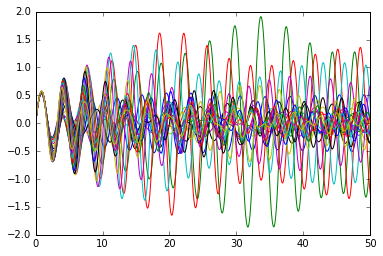

In [51]:
for w in arange(1,3,0.1):
    t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.001,w)
    plot(t,sol_23[:,0])
show()

Abajo se muestran las gráficas para w en [1,1.5,2,2.5,3]

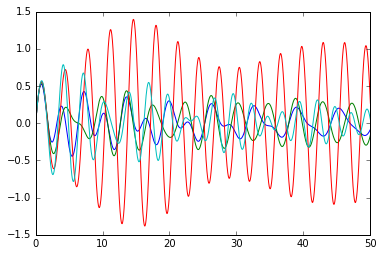

In [52]:
for w in arange(1,3,0.5):
    t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.001,w)
    plot(t,sol_23[:,0])
show()

Abajo se muestran las gráficas para w en [1,2,3]

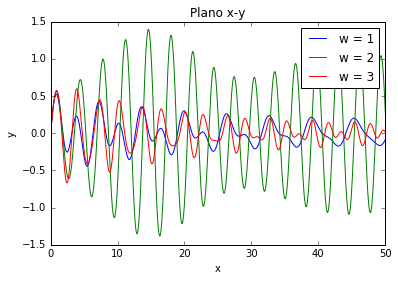

In [54]:


t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.001,1)
plot(t,sol_23[:,0], label = 'w = 1')
t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.001,2)
plot(t,sol_23[:,0], label = 'w = 2')
t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.001,3)
plot(t,sol_23[:,0], label = 'w = 3')
xlabel('x')
ylabel('y')
legend()
plt.title(u'Plano x-y')
show()

Dan la impresión de que la amplitud disminuye, veamos que pasa en un tiempo mas largo para cada una de estas

Para w = 3 en el intervalo [1,150]

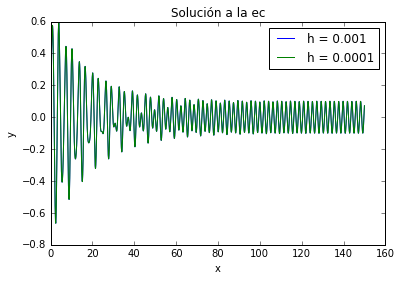

In [65]:
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,150],0.001,3)
plot(t,sol_23[:,0], label = 'h = 0.001')
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,150],0.0001,3)
plot(t,sol_23[:,0], label = 'h = 0.0001')
xlabel('x')
ylabel('y')
legend()
plt.title(u'Solución a la ec')

show()

Para w = 3 en el intervalo [0,50]

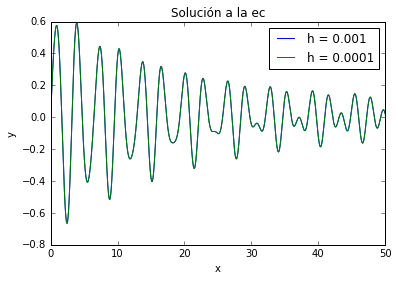

In [66]:
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,50],0.001,3)
plot(t,sol_23[:,0],label = 'h = 0.001')
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,50],0.0001,3)
plot(t,sol_23[:,0],label = 'h = 0.0001')
xlabel('x')
ylabel('y')
legend()
plt.title(u'Solución a la ec')
show()


Para w = 1 en el intervalo [1,150]

/home/actimuscopernico/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


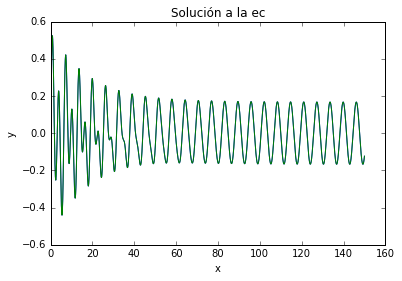

In [73]:
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,150],0.001,1)
plot(t,sol_23[:,0])
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,150],0.0001,1)
plot(t,sol_23[:,0])
xlabel('x')
ylabel('y')
legend()
plt.title(u'Solución a la ec')
show()

Para w = 1 en el intervalo [0,150]

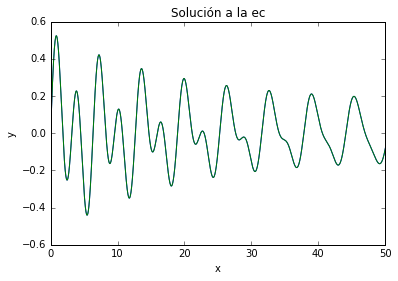

In [76]:
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,50],0.001,1)
plot(t,sol_23[:,0])
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,50],0.0001,1)
plot(t,sol_23[:,0])
xlabel('x')
ylabel('y')
legend()
plt.title(u'Solución a la ec')
show()


Para w = 2 en el intervalo [0,150]

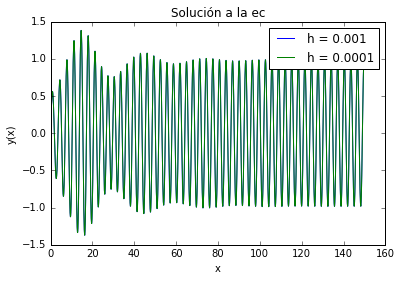

In [77]:
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,150],0.001,2)
plot(t,sol_23[:,0], label = 'h = 0.001')
t,sol_23 = Runge_Kuta4_argumentos(ec_3,[0,1],[0,150],0.0001,2)
plot(t,sol_23[:,0], label = 'h = 0.0001')
xlabel('x')
ylabel('y(x)')
legend()
plt.title(u'Solución a la ec')

show()

Para w = 2 en el intervalo [0,50]

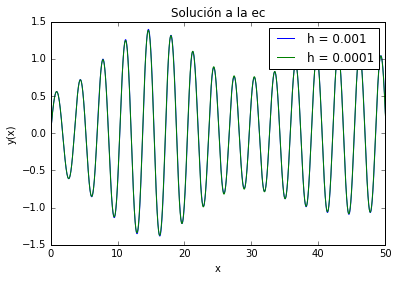

In [78]:
t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.001,2)
plot_1 = plot(t,sol_23[:,0], label = 'h = 0.001')
t,sol_23 = euler_args(ec_3,[0,1],[0,50],0.0001,2)
plot_2 = plot(t,sol_23[:,0],label='h = 0.0001')
xlabel('x')
ylabel('y(x)')
legend()
title(u'Solución a la ec')
    
show()
    

La ecuacion diferencial corresponde practicamente a un oscilador armónico forzado que sufre una fuerza de fricción proporcional a la velocidad, lo que es diferente es que el término que debería dar la fuerza de restitución no es proporcional al dezplazamiento sino al seno del dezplazamiento, lo que significa que si tenemos dezplazamietos pequeños y velocidades pequeñas el sistema debería aprecerse mucho a un oscilador forzado con fricción, y de hecho según las gráficas que hicimos el sistema tiene un comportamiento cualitativo parecido, la amplitud decrece hasta llegar a un estado estacionario. Aunque claro el comportamiento no es igual, si imaginamos una envolvente alrededor de las curvasesta no tendrá una forma exponencial como sería la envolvente de un oscilador armónico forzado confricción, esta parece la exponencial pero ademas tiene unas oscilaciones.
$$
$$
Si pensamos en la energía del sistema podemos observar que el sistema entrega energía al medio pormedio la fuerza de fricción (término proporcionala x') y recibe energía del medio por medio de una fuerza que cambia de manera senoidal, entonces la naturaleza del sistema sería: las condiciones iniciales de la velocidad indican qué tanta energía entrega el sistema al medio y las características de la fuerza senoidal indican qué tanta energía recibe, si entrega mas energía de la que recibe el sistema empezará a perder energía lo que se verá reflejado en la velocidad máxima que puede llegar a tener por tanto la velocidad promedio disminuye y por tanto empieza a ceder menos energía al medio así hasta que a energia que se entregue sea equiparable con la energía que se recibe, esto es lo que observamos en las gráficas, ya que la energía total está relacionada con la amplitud máxima que el objeto alcanza.

# Problema 4

Inciso a)

In [78]:
#Ecuacion diferencial del inciso
def ec_4(y,t):
    return array([10.*(y[1]-y[0]),y[0]*(28.-y[2])-y[1],y[0]*y[1]-(8/3)*y[2]])
def d_ec_4(y,t):
    return array([0,0,0]),array([[-10.,10.,0.],[28.-y[2],-1.,-y[0]],[y[1],y[0],-(8/3)]])

In [55]:
#números aleatorios - condiciones iniciales
x,y,z=rand()*10-5,rand()*10-5,rand()*10-5
print x,y,z

-4.24240089781 -1.0989995962 4.5684388856


Abajo se muestran las gráficas requeridas en el inciso a)

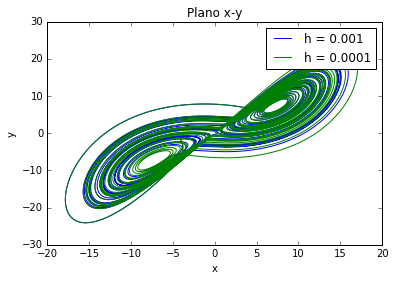

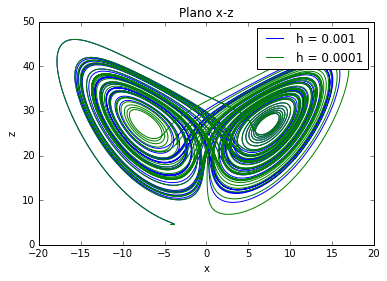

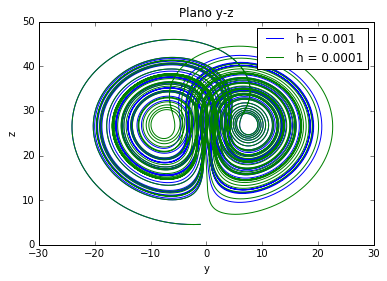

In [79]:
t,sol_24 = Runge_Kuta2(ec_4,[x,y,z],[0,50],0.001)
t,sol_25 = Runge_Kuta2(ec_4,[x,y,z],[0,50],0.0001)
plot(sol_24[:,0],sol_24[:,1],label = 'h = 0.001')
plot(sol_25[:,0],sol_25[:,1],label = 'h = 0.0001')

xlabel('x')
ylabel('y')
legend()
plt.title(u'Plano x-y')
show()

plot(sol_24[:,0],sol_24[:,2],label = 'h = 0.001')
plot(sol_25[:,0],sol_25[:,2],label = 'h = 0.0001')

xlabel('x')
ylabel('z')
legend()    
plt.title(u'Plano x-z')
show()

plot(sol_24[:,1],sol_24[:,2],label = 'h = 0.001')
plot(sol_25[:,1],sol_25[:,2],label = 'h = 0.0001')

xlabel('y')
ylabel('z')
legend()   
plt.title(u'Plano y-z')
show()

Inciso b)

Se muestran las trayectorias en un tiempo de 0 a 500 y con un paso de 0.001

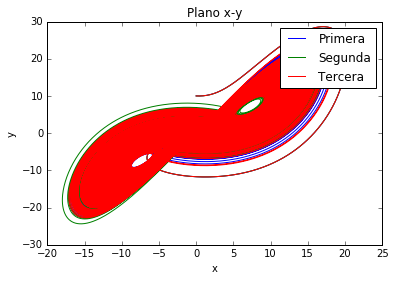

In [80]:
#- condiciones iniciales
x_2,y_2,z_2 = 0,10.03,0
x_3,y_3,z_3 = 0,10.01,0
x_4,y_4,z_4 = 0,10.02,0
t,sol_24 = Runge_Kuta2(ec_4,[x_2,y_2,z_2],[0,500],0.001)
t,sol_25 = Runge_Kuta2(ec_4,[x_3,y_3,z_3],[0,500],0.001)
t,sol_26 = Runge_Kuta2(ec_4,[x_4,y_4,z_4],[0,500],0.001)
plot(sol_24[:,0],sol_24[:,1],label = 'Primera')
plot(sol_25[:,0],sol_25[:,1],label = 'Segunda')
plot(sol_26[:,0],sol_26[:,1],label = 'Tercera')

xlabel('x')
ylabel('y')
legend()
plt.title(u'Plano x-y')
show()


Se muestran las trayectorias en un tiempo de 0 a 10 y con un paso de 0.001

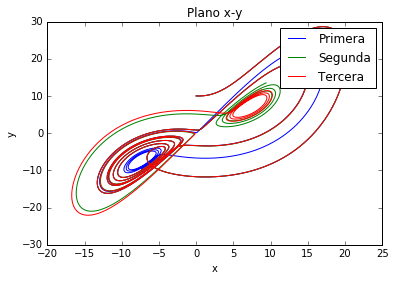

In [83]:
x_2,y_2,z_2 = 0,10.03,0
x_3,y_3,z_3 = 0,10.01,0
x_4,y_4,z_4 = 0,10.02,0
t,sol_24 = Runge_Kuta2(ec_4,[x_2,y_2,z_2],[0,10],0.001)
t,sol_25 = Runge_Kuta2(ec_4,[x_3,y_3,z_3],[0,10],0.001)
t,sol_26 = Runge_Kuta2(ec_4,[x_4,y_4,z_4],[0,10],0.001)
plot(sol_24[:,0],sol_24[:,1],label = 'Primera')
plot(sol_25[:,0],sol_25[:,1],label = 'Segunda')
plot(sol_26[:,0],sol_26[:,1],label = 'Tercera')

xlabel('x')
ylabel('y')
legend()
plt.title(u'Plano x-y')
show()


En la gráfica anterior podemos observar como las trayectorias difieren bastante para un tiempo no tan grande, a pesar de eso el comportamiento cualitativo es parecido